In [1]:
import os
os.environ["SPS_HOME"] = "/Users/fpetri/packages/fsps" 


In [2]:
import numpy as np
import lbg_forecast.nz as nz
import lbg_forecast.emulator as em
import lbg_forecast.hyperparameters as hyp
import lbg_forecast.population_model as pop
import lbg_forecast.priors as pr
import matplotlib.pyplot as plt
import lbg_forecast.sfh as sfh
import scipy as sc
from getdist import plots, MCSamples

In [3]:
sps_params = np.load("spsp_test.npy")
nzs = np.load("nzs_test.npy", allow_pickle=True)

nhypersamples = sps_params.shape[0]
ndropouts = 3
colours = ['blue', 'red', 'green']
print(nhypersamples)

50


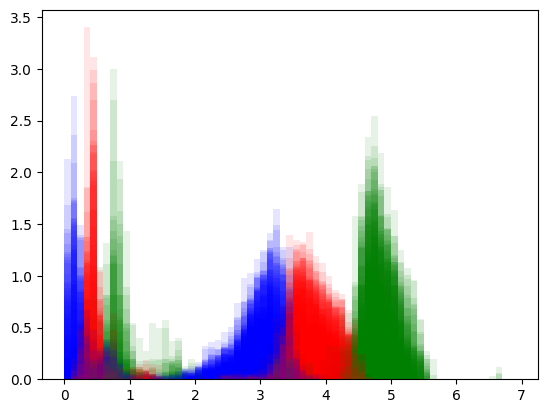

In [4]:
for ind in range(nhypersamples):
    for drop in range(ndropouts):
        hist = plt.hist(nzs[ind][drop][0], density=True, bins=nz.default_nz_bins(), alpha = 0.1, color=colours[drop])

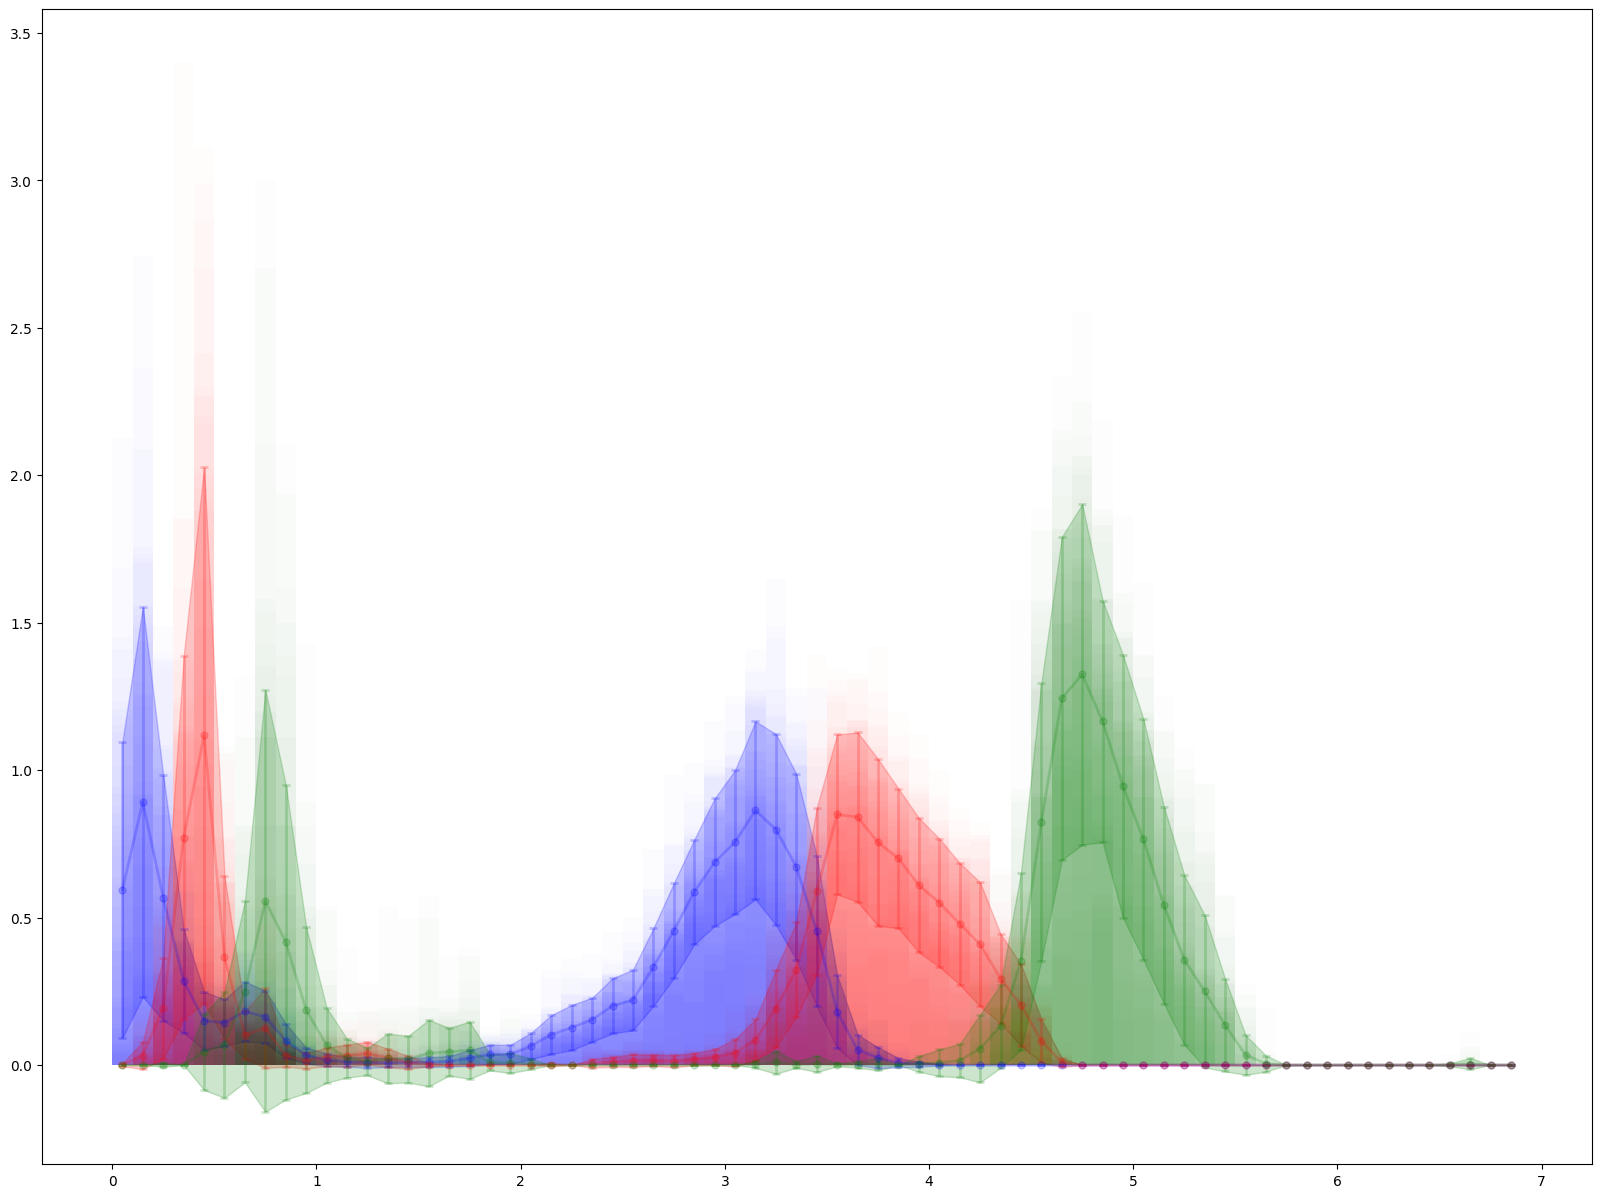

In [5]:
fig1, axes = plt.subplots(1, 1, figsize=(20,15), sharex=False, sharey=False)

for drop in range(ndropouts):

    values = []
    x = []
    for ind in range(nhypersamples):
        hist = axes.hist(nzs[ind][drop][0], density=True, bins=nz.default_nz_bins(), alpha = 0.01, color=colours[drop])
        values.append(hist[0])
        x.append(hist[1])

    values = np.hstack((np.array(values)))
    x = np.array(x)
    x = np.hstack(((x+0.05)[:,:-1]))


    bin_means, bin_edges, binnumber = sc.stats.binned_statistic(x, values, 'mean', bins=nz.default_nz_bins())
    bin_std, bin_edges, binnumber = sc.stats.binned_statistic(x, values, 'std', bins=nz.default_nz_bins())
    bin_width = (bin_edges[1] - bin_edges[0])
    bin_centers = bin_edges[1:] - bin_width/2

    axes.errorbar(bin_centers, bin_means, bin_std, alpha=0.2, ms=10, marker=".", elinewidth=2, capsize=3, capthick=2, lw=2, color=colours[drop])
    axes.fill_between(bin_centers, bin_means-bin_std, bin_means+bin_std, alpha=0.2, color=colours[drop])

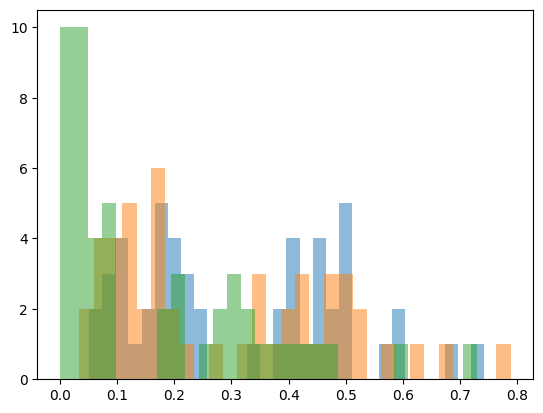

In [6]:
def calculate_interloper_fraction(nz_redshift_samples):

    nint = len(np.where(nz_redshift_samples < 1.5)[0])
    tot = nz_redshift_samples.shape[0]
    return nint/tot

def calculate_highz_fraction(sps_parameter_samples):

    n_high_z = (np.where(sps_parameter_samples[:, 0] > 2.5)[0]).shape[0]
    n_tot = sps_parameter_samples[:, 0].shape[0]

    return n_high_z/n_tot

def calculate_highm_fraction(sps_parameter_samples):
    
    n_high_m = (np.where(sps_parameter_samples[:, -1] > 10**9)[0]).shape[0]
    n_tot = sps_parameter_samples[:, -1].shape[0]

    return n_high_m/n_tot

interloper_fractions = []
hyperparameters = []
highz_fracs = []
highm_fracs = []

ndropouts = 3
colours = ['blue', 'red', 'green']
for dropout in range(ndropouts):
    hyperparameters = []
    interloper_fractions = []
    highz_fracs = []
    highm_fracs = []
    logsfhmeans = []
    for index in range(nhypersamples):
        interloper_fractions.append(calculate_interloper_fraction(nzs[index][dropout][0]))
    plt.hist(interloper_fractions, bins=30, alpha=0.5)

0.25510204081632654
0.20273972602739726
0.047619047619047616


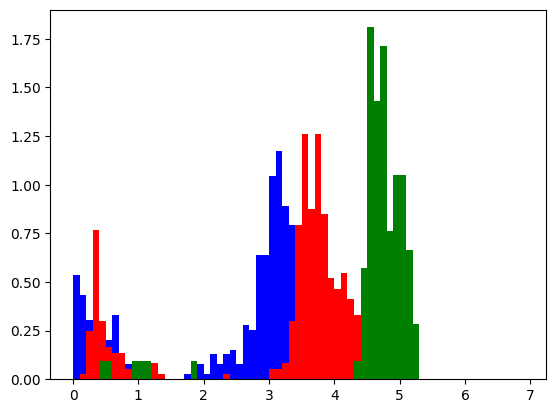

In [7]:
index = 0
for drop in range(ndropouts):
    hist = plt.hist(nzs[index][drop][0], density=True, bins=nz.default_nz_bins(), alpha = 1.0, color=colours[drop])
    print(calculate_interloper_fraction(nzs[index][drop][0]))


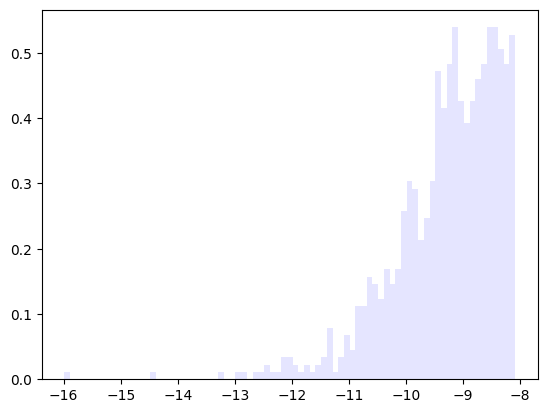

In [8]:
ssfrs = sfh.plot_recent_sfrs(sps_params[index], plot=True)

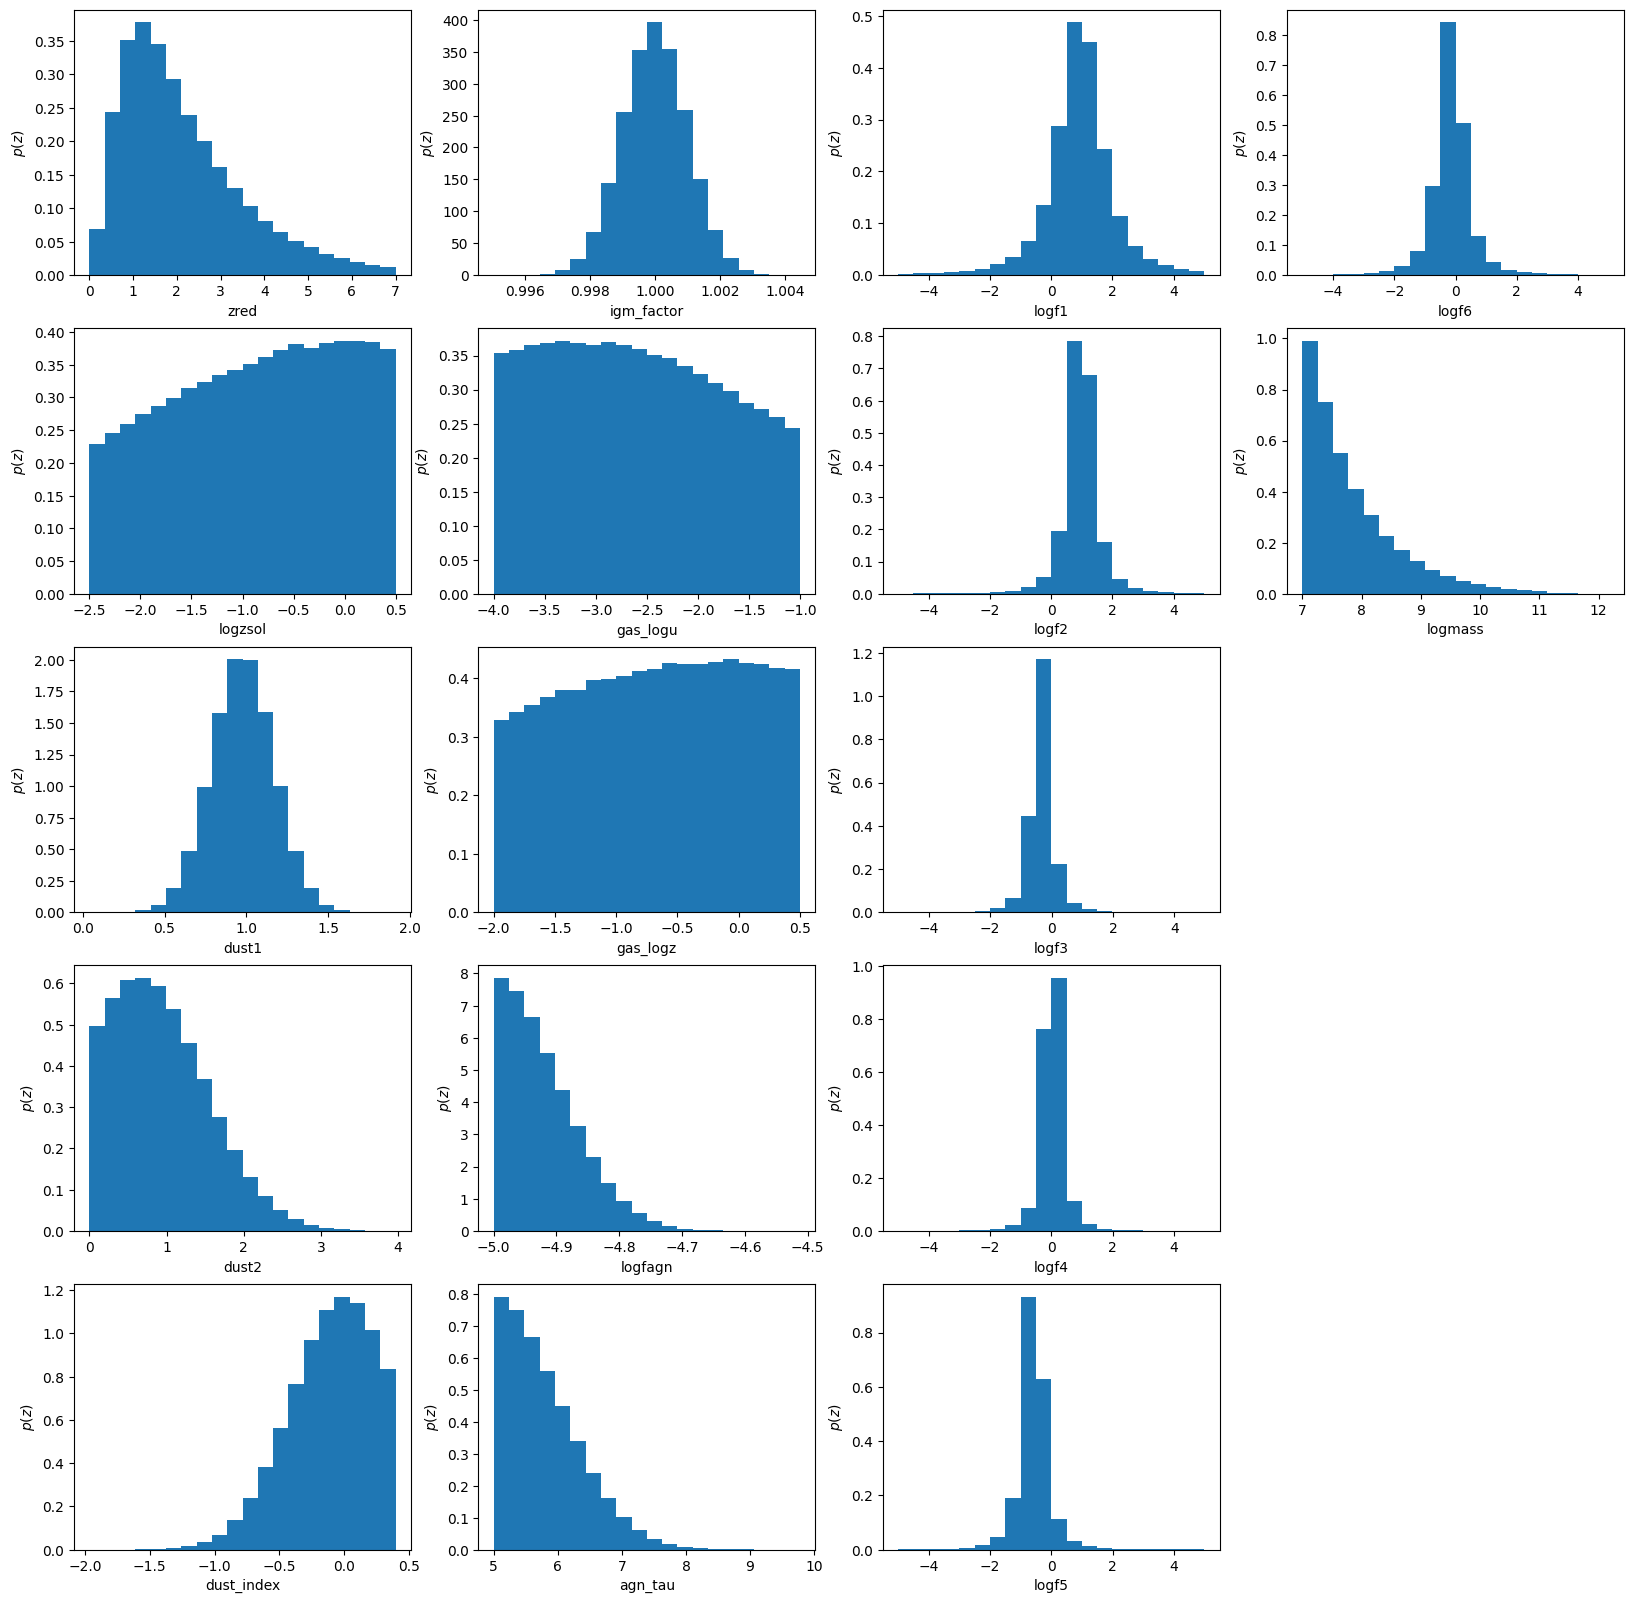

In [9]:
pop.plot_galaxy_population(sps_params[index])

In [10]:
sps_params[index, :100, :].shape

(100, 17)

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


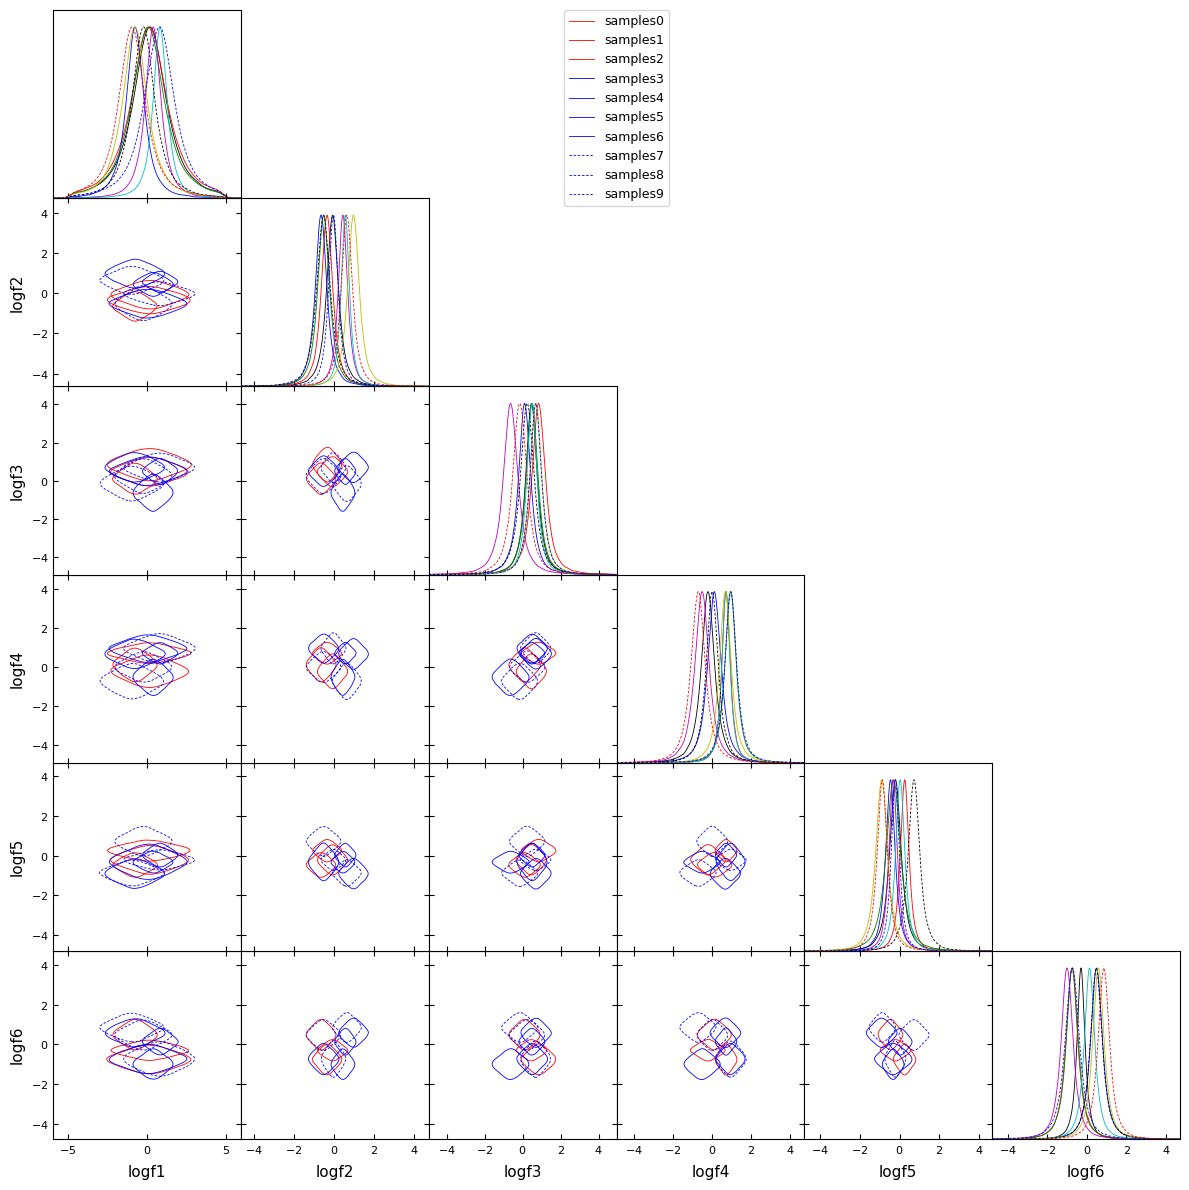

In [11]:
# Triangle plot
sps_params = np.load("spsp_test.npy")
n_plotting_samples = 100000
min_params = 10
max_params = 16

indexes = [44, 2, 20]
indexes_int = [1, 11, 14, 17, 23, 26, 27]
samples = []
samples_int = []
names = pop.sps_parameter_names()[min_params:max_params]

for index in indexes:

    sfh_samples = sps_params[index, :n_plotting_samples, min_params:max_params].copy()
    sfh_mc_samples = MCSamples(samples=sfh_samples, names=names)
    samples.append(sfh_mc_samples)

for index in indexes_int:

    sfh_samples = sps_params[index, :n_plotting_samples, min_params:max_params].copy()
    sfh_mc_samples = MCSamples(samples=sfh_samples, names=names)
    samples_int.append(sfh_mc_samples)

#sps_params_plot_interloper = sps_params[27, :n_plotting_samples, min_params:max_params].copy() #1, 11, 14, 17, 23, 26, 27
#sps_params_plot_highz = sps_params[44, :n_plotting_samples, min_params:max_params].copy() #2, 10, 20, 44

#sps_params_plot_interloper[:, 8] = np.log10(sps_params_plot_interloper[:, 8])
#sps_params_plot_interloper[:, -1] = np.log10(sps_params_plot_interloper[:, -1])

#sps_params_plot_highz[:, 8] = np.log10(sps_params_plot_highz[:, 8])
#sps_params_plot_highz[:, -1] = np.log10(sps_params_plot_highz[:, -1])

g = plots.get_subplot_plotter(analysis_settings={'contours':[0.01]})

#samples_interloper = MCSamples(samples=sps_params_plot_interloper, names=names)
#samples_highz = MCSamples(samples=sps_params_plot_highz, names=names)
g.settings.num_plot_contours = 1
g.triangle_plot(samples+samples_int, filled=False, colors=['red']*len(indexes)+['blue']*len(indexes_int))

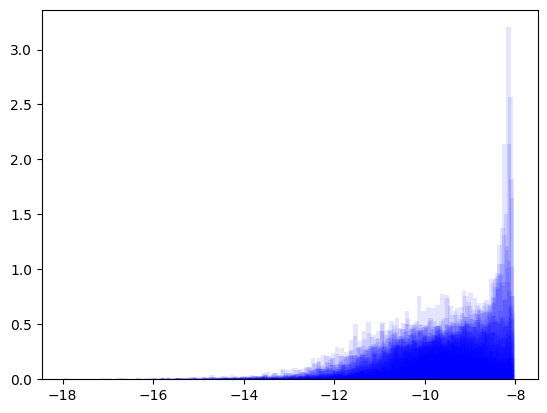

In [12]:
index = 0
nsfrs = 1000
for index in range(sps_params.shape[0]):
    sfh.plot_recent_sfrs(sps_params[index], plot=True)
